In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [267]:
df = pd.read_csv('../datasets/final_training_dataset.csv')

# Data Understanding

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kecamatan        31 non-null     object 
 1   jumlah_fnb       31 non-null     int64  
 2   avg_rating       31 non-null     float64
 3   jumlah_taman     31 non-null     float64
 4   avg_price        31 non-null     float64
 5   Jumlah Penduduk  31 non-null     float64
 6   Luas Wilayah     31 non-null     float64
 7   Kepadatan Jiwa   31 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.1+ KB


In [269]:
df.dtypes

kecamatan           object
jumlah_fnb           int64
avg_rating         float64
jumlah_taman       float64
avg_price          float64
Jumlah Penduduk    float64
Luas Wilayah       float64
Kepadatan Jiwa     float64
dtype: object

In [270]:
df.describe()

,jumlah_fnb,avg_rating,jumlah_taman,avg_price,Jumlah Penduduk,Luas Wilayah,Kepadatan Jiwa
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,165.032258,4.515484,32.225806,68167.525806,81627.354839,5.672258,15936.934194
std,189.982365,0.088274,27.198909,6647.114960,34547.028614,1.687957,7503.311198
min,1.000000,4.200000,0.000000,53750.000000,0.000000,2.680000,4224.000000
25%,50.000000,4.480000,15.000000,63444.700000,66040.500000,4.445000,11238.765000
50%,95.000000,4.520000,23.000000,69516.130000,80530.000000,5.360000,14871.010000
75%,178.500000,4.560000,43.500000,73298.420000,103750.000000,6.980000,19588.960000
max,817.000000,4.670000,117.000000,79710.140000,143651.000000,9.960000,39847.120000


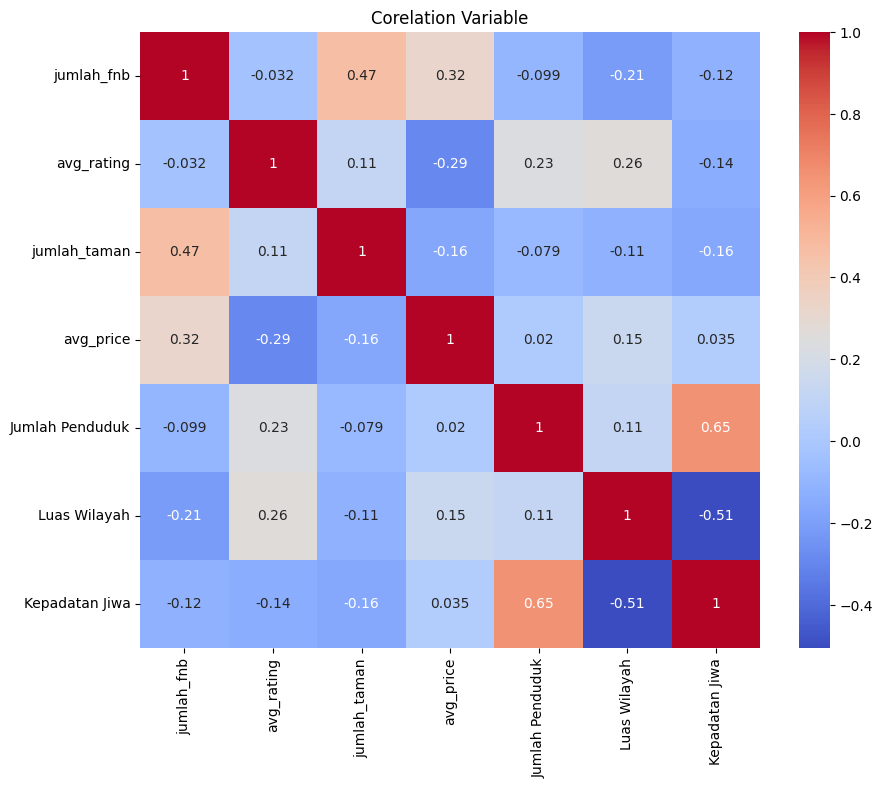

In [271]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True, cmap='coolwarm')
plt.title('Corelation Variable')
plt.savefig('../results/Correlation_Variable_Final.png')

## Feature Engineering

fnb_per_capita: jumlah_fnb / Jumlah Penduduk

Makna: Mengukur tingkat saturasi atau persaingan F&B relatif terhadap populasi. Apakah ada 1 F&B untuk setiap 100 orang atau 1000 orang? Ini bisa menunjukkan pasar yang sudah jenuh atau justru masih punya banyak ruang.

fnb_per_km2: jumlah_fnb / Luas Wilayah

Makna: Mengukur kepadatan geografis F&B. Apakah restoran-restoran cenderung berkumpul di satu area kecil atau tersebar luas?

taman_per_capita: jumlah_taman / Jumlah Penduduk

Makna: Bisa menjadi proksi untuk kualitas hidup atau seberapa "ramah keluarga" sebuah wilayah, yang mungkin memengaruhi jenis F&B yang sukses.

Kolom 'jumlah_penduduk_usia_produktif' tidak ditemukan, dibuat estimasi 70% dari 'Jumlah Penduduk'.


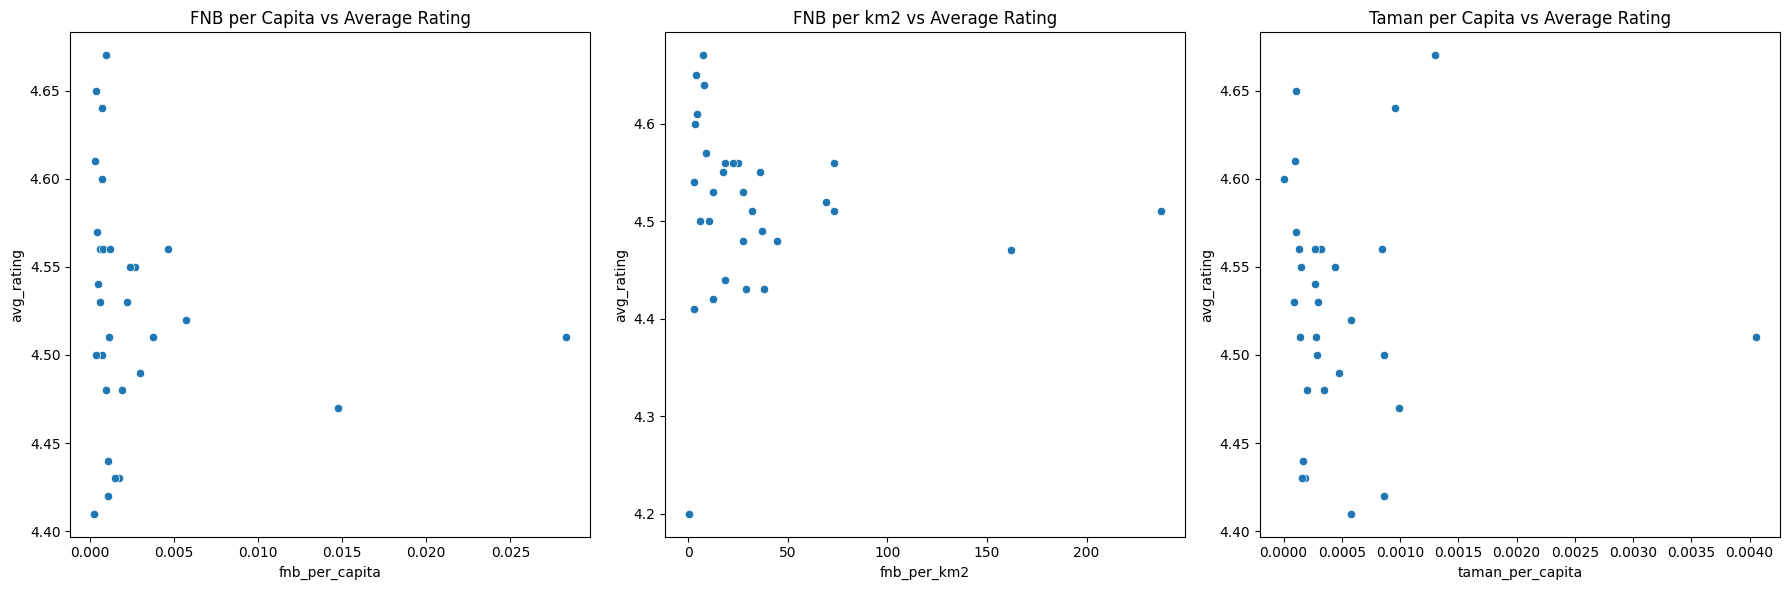

In [272]:
# Feature engineering
df['fnb_per_capita'] = df['jumlah_fnb'] / df['Jumlah Penduduk']
df['fnb_per_km2'] = df['jumlah_fnb'] / df['Luas Wilayah']
df['taman_per_capita'] = df['jumlah_taman'] / df['Jumlah Penduduk']
# Untuk penduduk_produktif_ratio, jika kolom 'jumlah_penduduk_usia_produktif' tidak ada, buat estimasi (misal: 70% dari Jumlah Penduduk)
# Asumsi: 70% penduduk adalah usia produktif (bisa disesuaikan dengan sumber data demografi)
df['jumlah_penduduk_usia_produktif'] = df['Jumlah Penduduk'] * 0.65
df['penduduk_produktif_ratio'] = df['jumlah_penduduk_usia_produktif'] / df['Jumlah Penduduk']
print("Kolom 'jumlah_penduduk_usia_produktif' tidak ditemukan, dibuat estimasi 70% dari 'Jumlah Penduduk'.")



plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='fnb_per_capita', y='avg_rating', data=df)
plt.title('FNB per Capita vs Average Rating')

plt.subplot(1, 3, 2)
sns.scatterplot(x='fnb_per_km2', y='avg_rating', data=df)
plt.title('FNB per km2 vs Average Rating')

plt.subplot(1, 3, 3)
sns.scatterplot(x='taman_per_capita', y='avg_rating', data=df)
plt.title('Taman per Capita vs Average Rating')

plt.tight_layout()
plt.savefig('../results/Feature_Engineering_Scatterplots.png')
plt.show()

## Handling Missing Value

In [273]:

# Isi nilai kosong pada 'taman_per_capita' dan 'penduduk_produktif_ratio' dengan median masing-masing kolom
df['taman_per_capita'].fillna(df['taman_per_capita'].median(), inplace=True)
df['penduduk_produktif_ratio'].fillna(df['penduduk_produktif_ratio'].median(), inplace=True)
df.isna().sum()

C:\Users\ridho\AppData\Local\Temp\ipykernel_12544\2921109131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['taman_per_capita'].fillna(df['taman_per_capita'].median(), inplace=True)
C:\Users\ridho\AppData\Local\Temp\ipykernel_12544\2921109131.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

kecamatan                         0
jumlah_fnb                        0
avg_rating                        0
jumlah_taman                      0
avg_price                         0
Jumlah Penduduk                   0
Luas Wilayah                      0
Kepadatan Jiwa                    0
fnb_per_capita                    0
fnb_per_km2                       0
taman_per_capita                  0
jumlah_penduduk_usia_produktif    0
penduduk_produktif_ratio          0
dtype: int64

### Visualisasi AVG_Rating

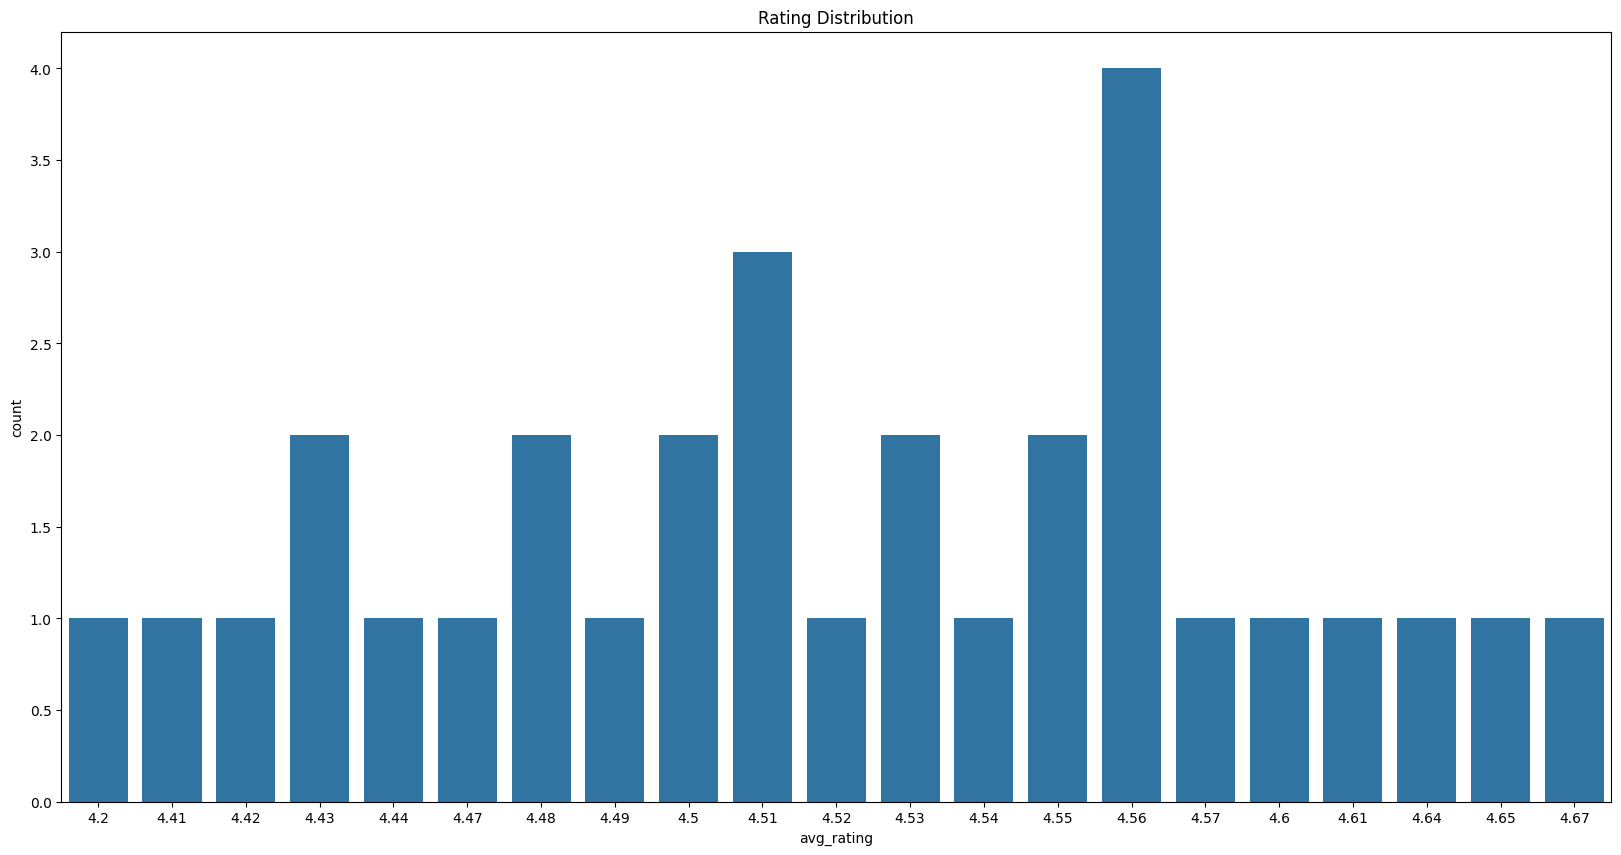

In [274]:
plt.figure(figsize=(20,10))
sns.countplot(x="avg_rating", data=df)
plt.title('Rating Distribution')
plt.savefig('../results/Rating_Distribution.png')

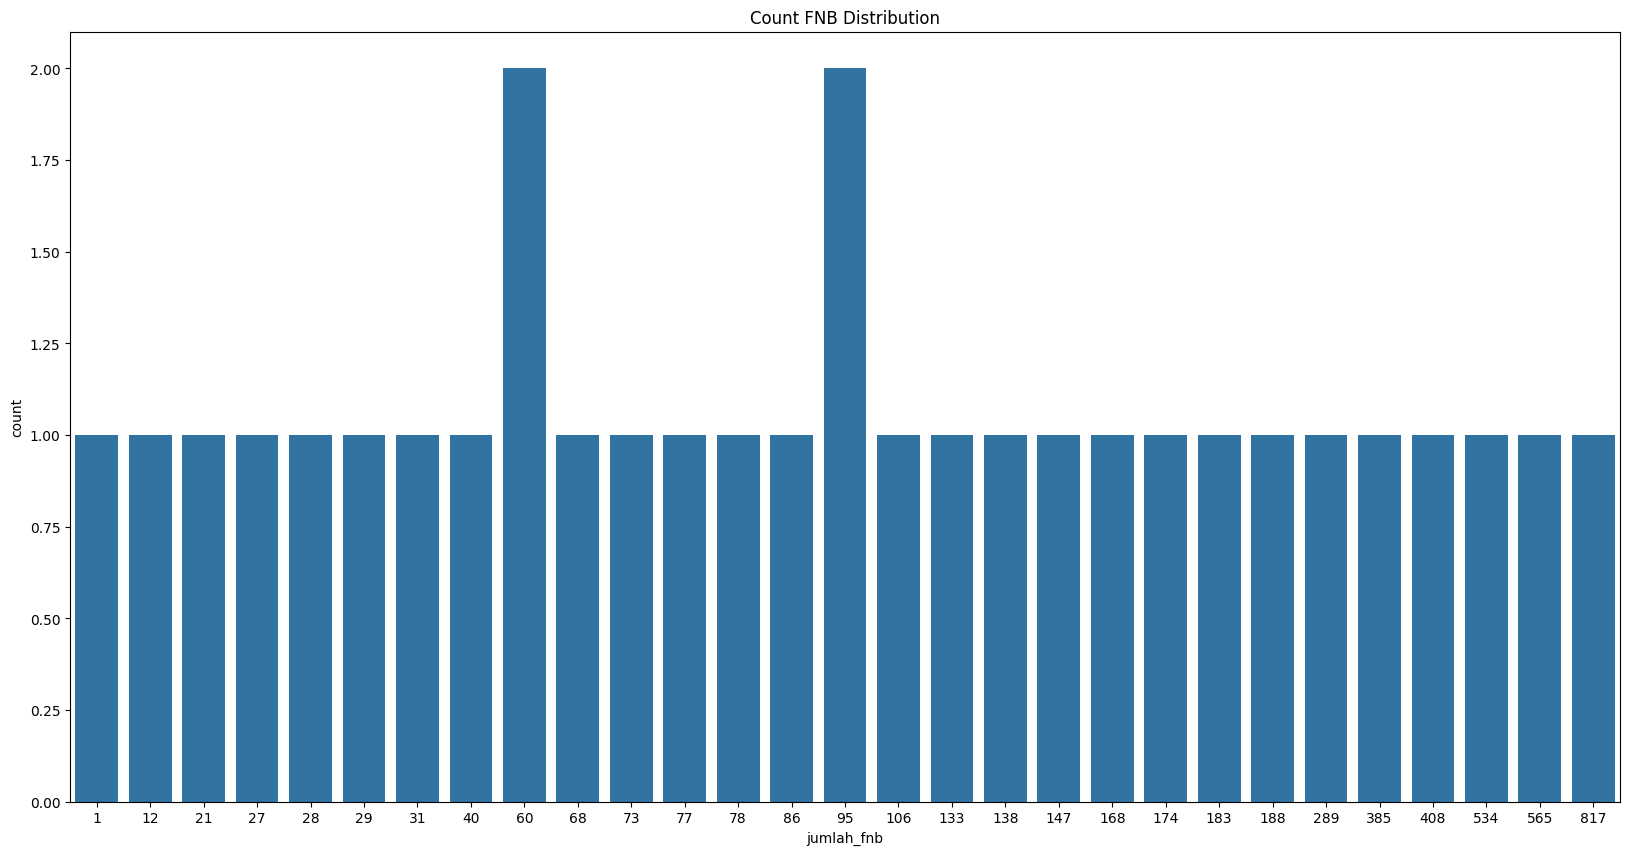

In [275]:
plt.figure(figsize=(20,10))
sns.countplot(x="jumlah_fnb", data=df)
plt.title('Count FNB Distribution')
plt.savefig('../results/Count_Fnb_Distribution.png')

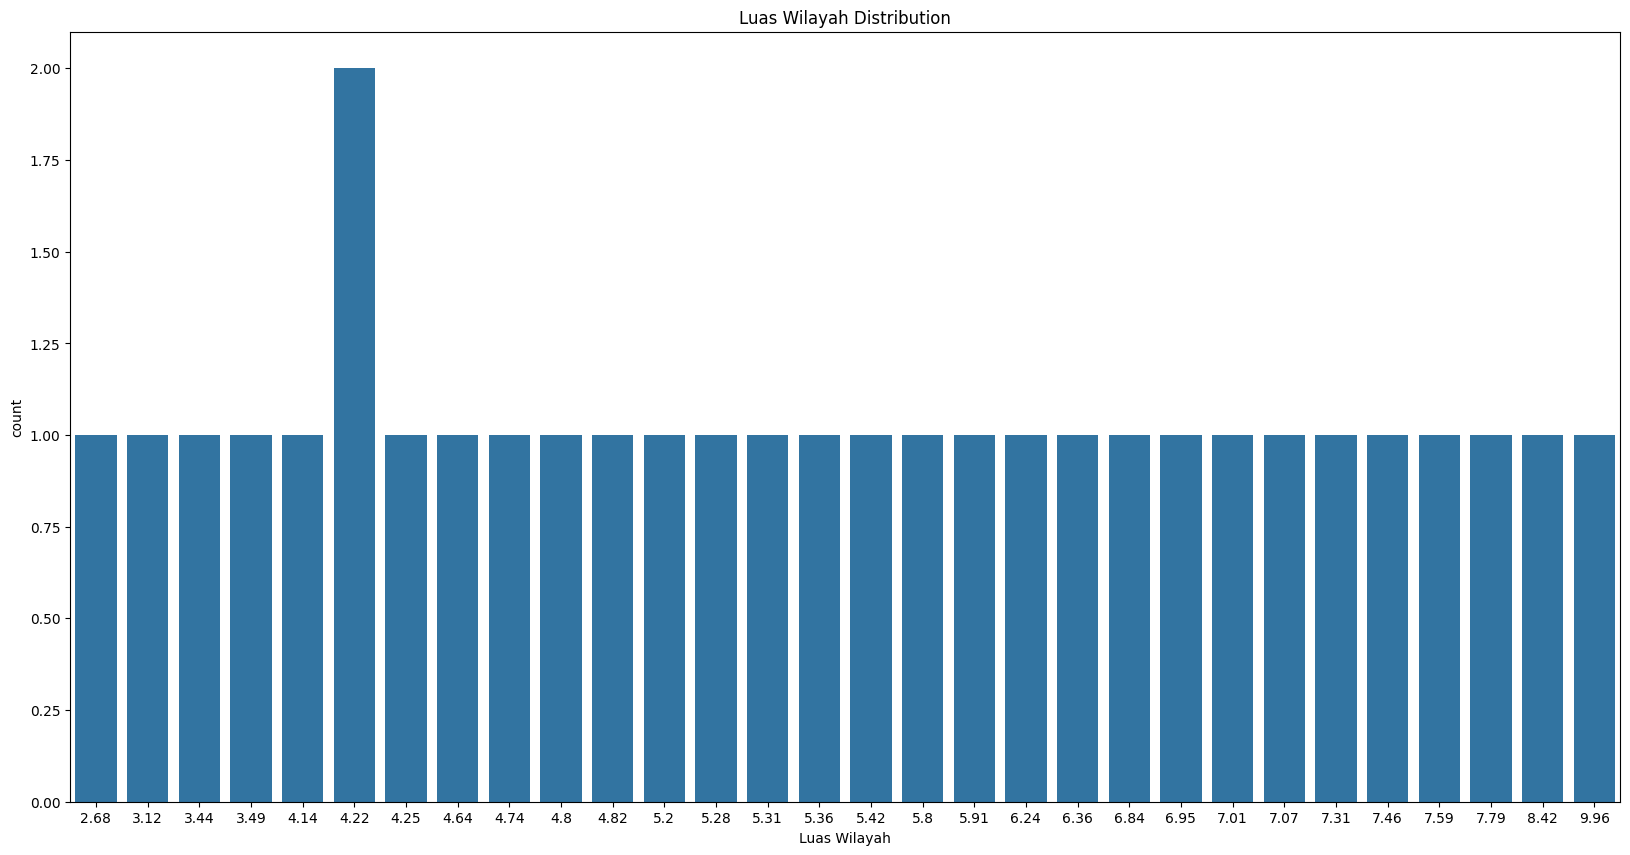

In [276]:
plt.figure(figsize=(20,10))
sns.countplot(x="Luas Wilayah", data=df)
plt.title('Luas Wilayah Distribution')
plt.savefig('../results/Luas Wilayah.png')

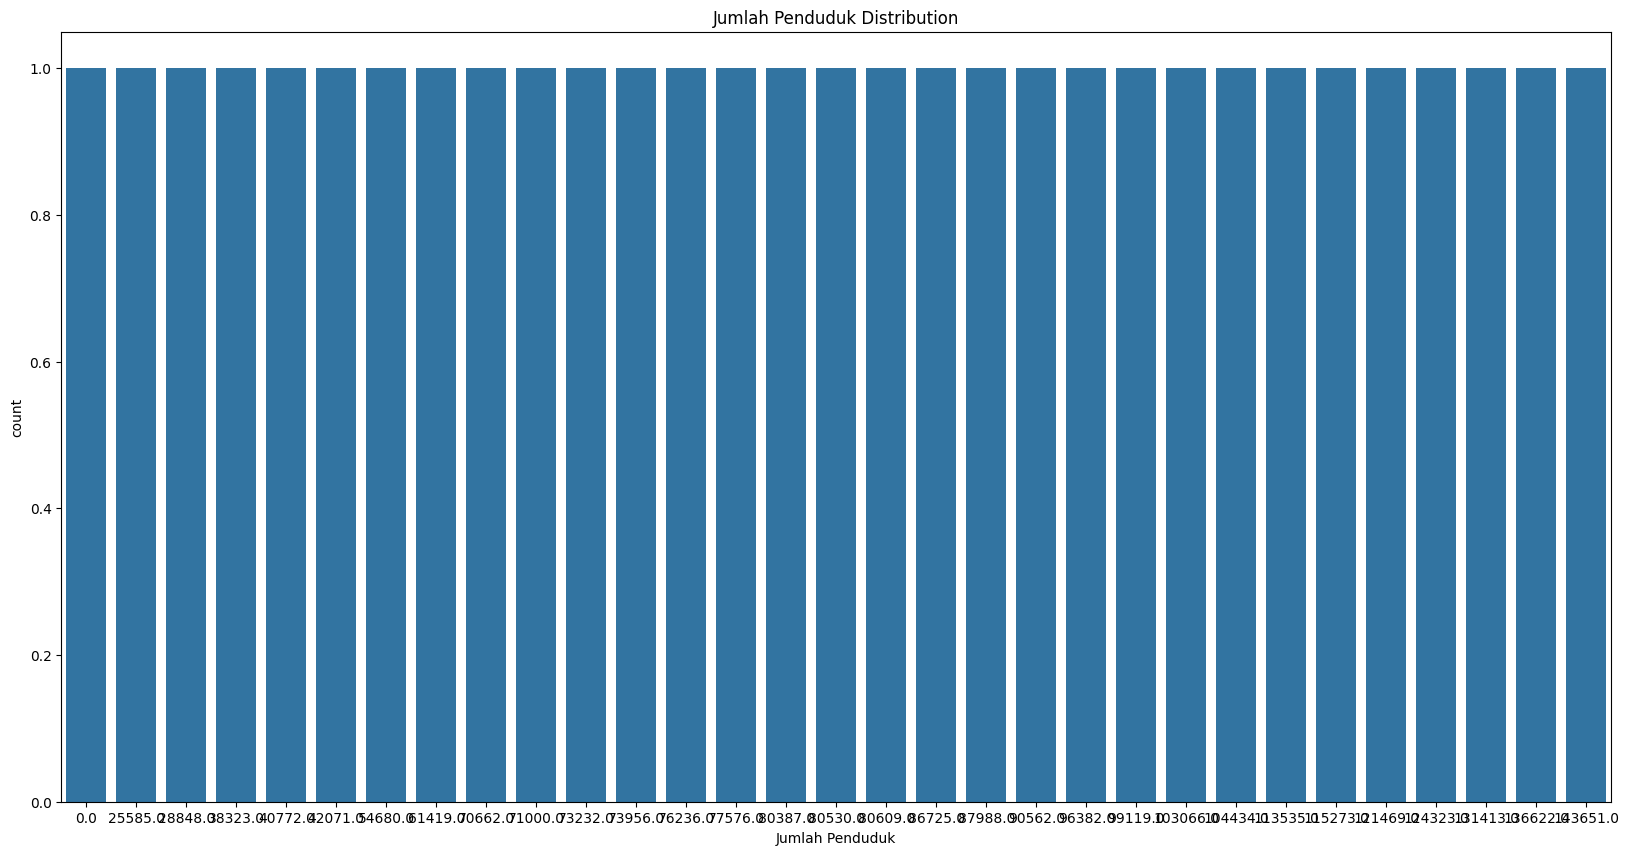

In [277]:
plt.figure(figsize=(20,10))
sns.countplot(x="Jumlah Penduduk", data=df)
plt.title('Jumlah Penduduk Distribution')
plt.savefig('../results/Jumlah Penduduk.png')

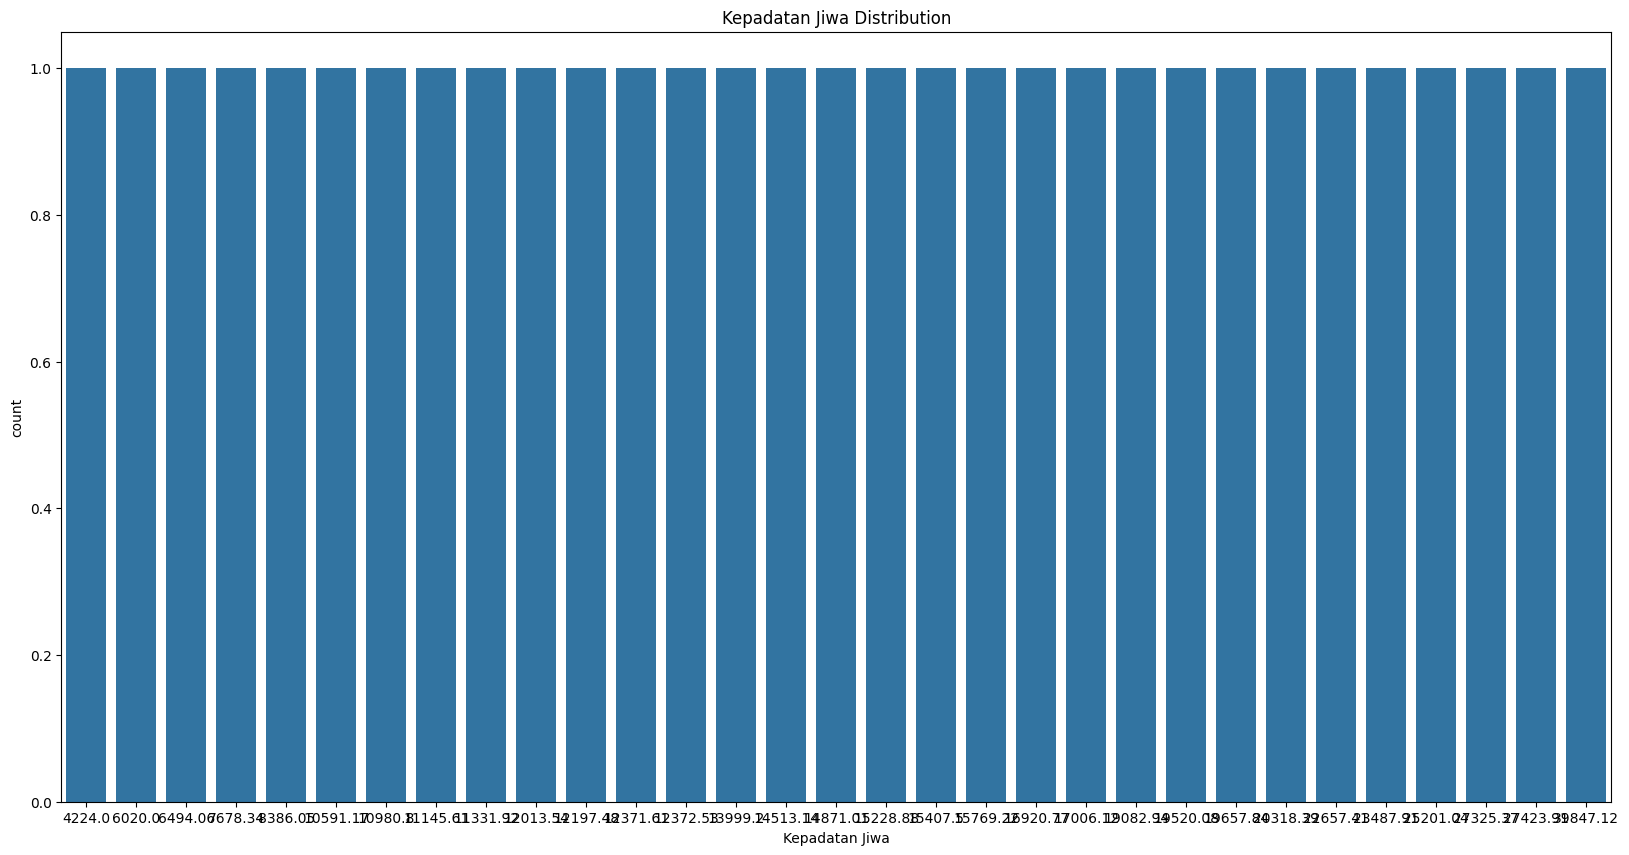

In [278]:
plt.figure(figsize=(20,10))
sns.countplot(x="Kepadatan Jiwa", data=df)
plt.title('Kepadatan Jiwa Distribution')
plt.savefig('../results/Kepadatan Jiwa.png')

### Insight Datas vs AVG Rating using scatterplot

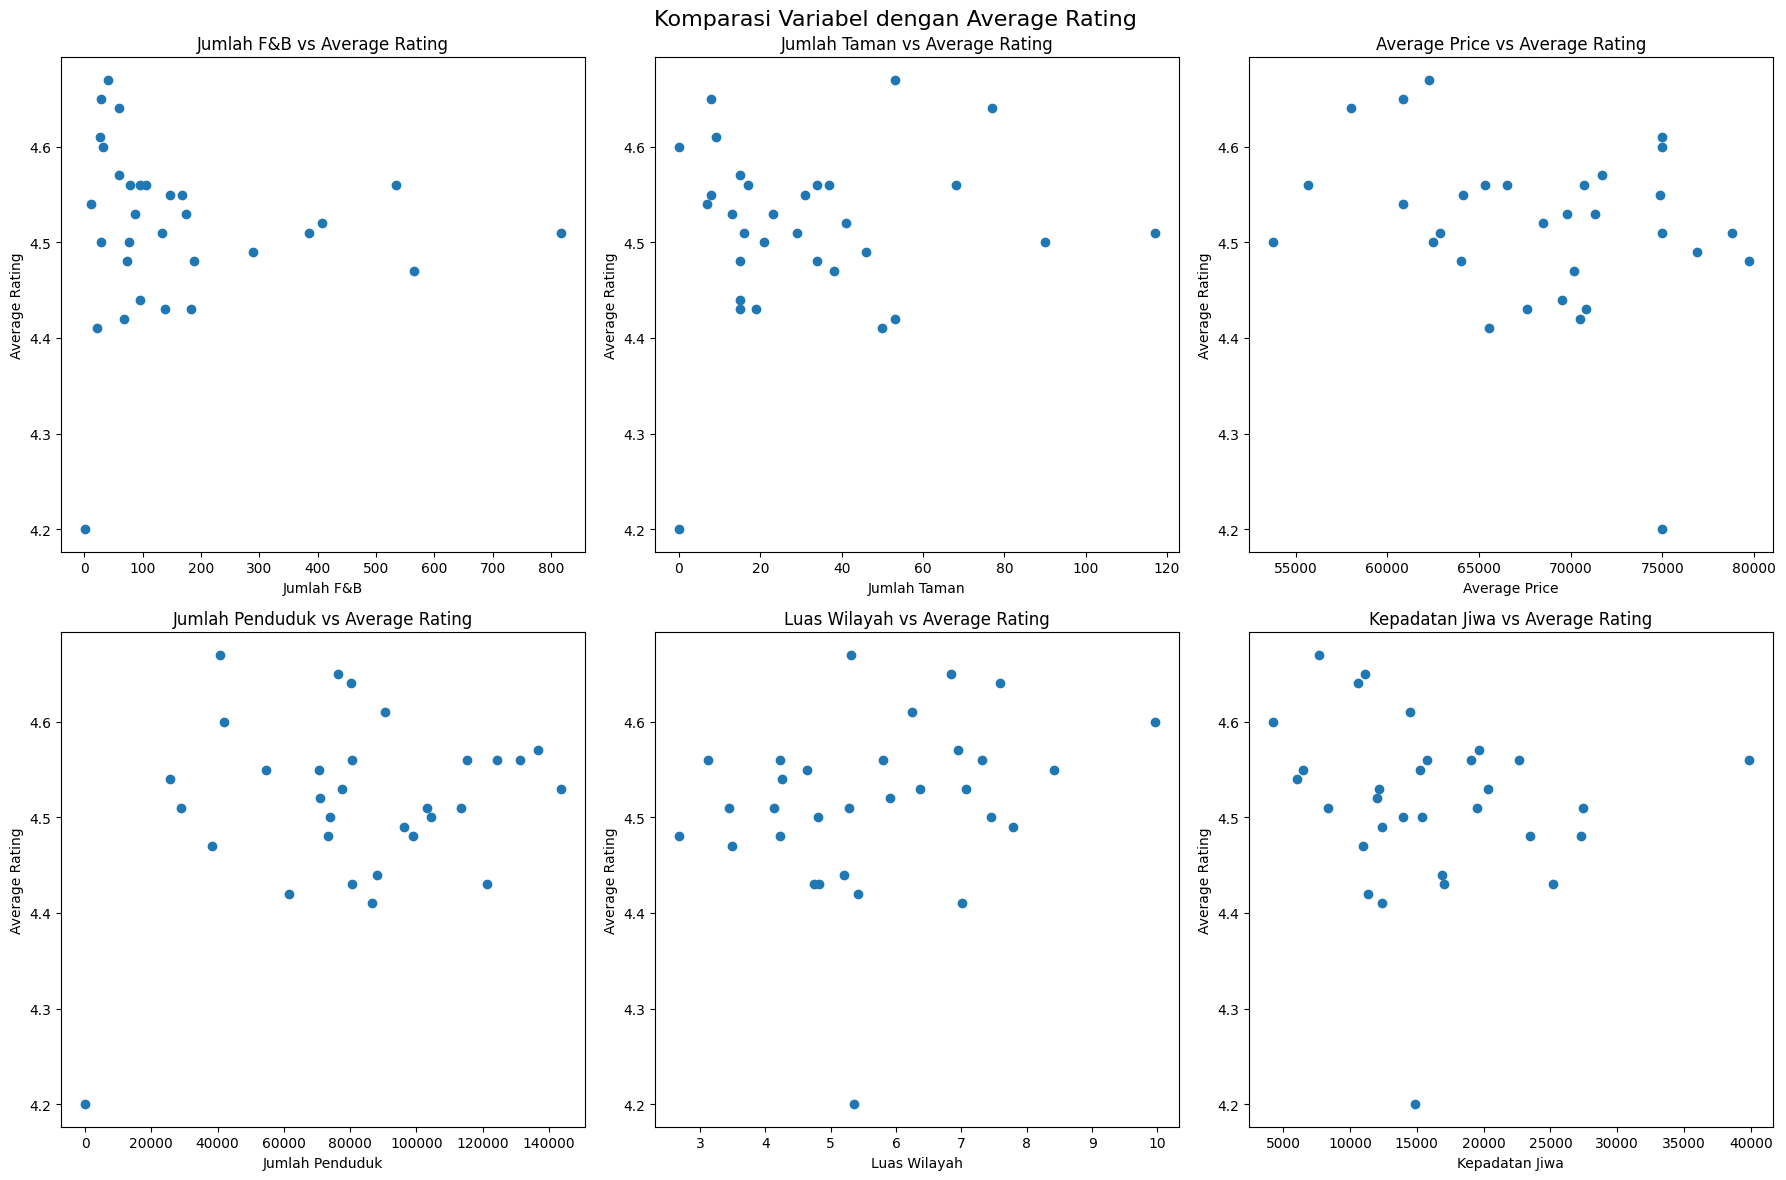

In [279]:
# Komparasi beberapa variabel dengan avg_rating
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Komparasi Variabel dengan Average Rating', fontsize=16)

# Scatter plot 1: Jumlah F&B vs AVG Rating
axes[0, 0].scatter(df['jumlah_fnb'], df['avg_rating'])
axes[0, 0].set_xlabel('Jumlah F&B')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Jumlah F&B vs Average Rating')

# Scatter plot 2: Jumlah Taman vs AVG Rating
axes[0, 1].scatter(df['jumlah_taman'], df['avg_rating'])
axes[0, 1].set_xlabel('Jumlah Taman')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Jumlah Taman vs Average Rating')

# Scatter plot 3: Average Price vs AVG Rating
axes[0, 2].scatter(df['avg_price'], df['avg_rating'])
axes[0, 2].set_xlabel('Average Price')
axes[0, 2].set_ylabel('Average Rating')
axes[0, 2].set_title('Average Price vs Average Rating')

# Scatter plot 4: Jumlah Penduduk vs AVG Rating
axes[1, 0].scatter(df['Jumlah Penduduk'], df['avg_rating'])
axes[1, 0].set_xlabel('Jumlah Penduduk')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_title('Jumlah Penduduk vs Average Rating')

# Scatter plot 5: Luas Wilayah vs AVG Rating
axes[1, 1].scatter(df['Luas Wilayah'], df['avg_rating'])
axes[1, 1].set_xlabel('Luas Wilayah')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Luas Wilayah vs Average Rating')

# Scatter plot 6: Kepadatan Jiwa vs AVG Rating
axes[1, 2].scatter(df['Kepadatan Jiwa'], df['avg_rating'])
axes[1, 2].set_xlabel('Kepadatan Jiwa')
axes[1, 2].set_ylabel('Average Rating')
axes[1, 2].set_title('Kepadatan Jiwa vs Average Rating')

plt.tight_layout()
plt.savefig('../results/Komparasi_Variabel_dengan_AVG_Rating.png', dpi=300, bbox_inches='tight')
plt.show()

## Check outlier data in datasets

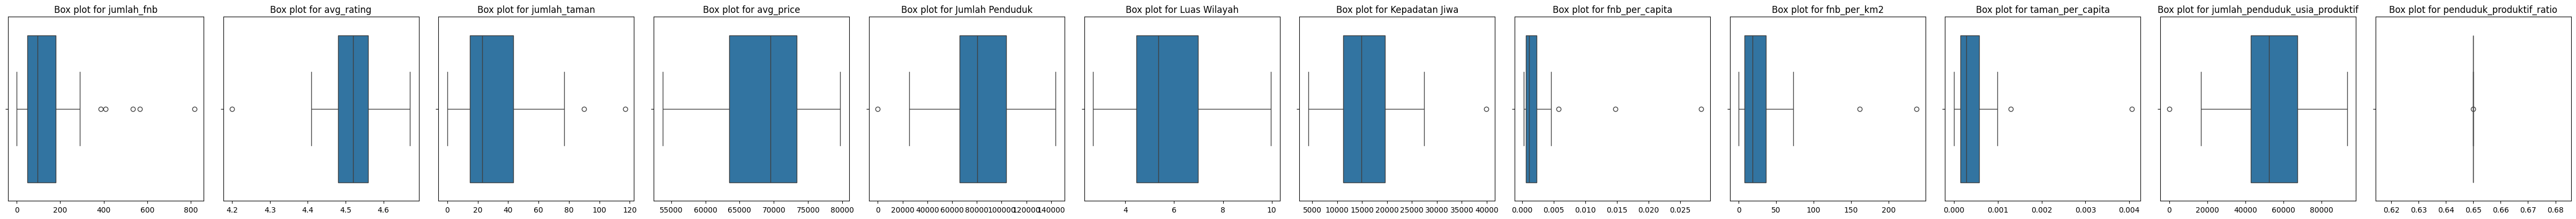

<Figure size 640x480 with 0 Axes>

In [280]:
num_cols = df.select_dtypes(include=[np.number]).columns  #berfungsi untuk mengambil kolom dengan tipe data numerik pada dataset
fig, axs = plt.subplots(ncols=len(num_cols), figsize=(4 * len(num_cols), 4))

#berfungsi untuk membuat grid plot secara horizontal menyesuaikan dengan ukurannya pada subplot

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f'Box plot for {col}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
plt.show()
plt.savefig('../results/Box_Plot.png')

## Handling outlier with scaling using standard Scaler

In [281]:
numerik = df.select_dtypes(include=[np.number]).columns.tolist()

# scaler = StandardScaler()
# df[numerik] = scaler.fit_transform(df[numerik])
print(df[numerik].describe())


# # Menghilangkan outlier dengan metode IQR
# Q1 = df[numerik].quantile(0.25)
# Q3 = df[numerik].quantile(0.75)
# IQR = Q3 - Q1

# # Filter data yang berada di dalam rentang IQR (tidak outlier)
# df_iqr = df[~((df[numerik] < (Q1 - 1.5 * IQR)) | (df[numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(df_iqr[numerik].describe())


       jumlah_fnb  avg_rating  jumlah_taman     avg_price  Jumlah Penduduk  \
count   31.000000   31.000000     31.000000     31.000000        31.000000   
mean   165.032258    4.515484     32.225806  68167.525806     81627.354839   
std    189.982365    0.088274     27.198909   6647.114960     34547.028614   
min      1.000000    4.200000      0.000000  53750.000000         0.000000   
25%     50.000000    4.480000     15.000000  63444.700000     66040.500000   
50%     95.000000    4.520000     23.000000  69516.130000     80530.000000   
75%    178.500000    4.560000     43.500000  73298.420000    103750.000000   
max    817.000000    4.670000    117.000000  79710.140000    143651.000000   

       Luas Wilayah  Kepadatan Jiwa  fnb_per_capita  fnb_per_km2  \
count     31.000000       31.000000       31.000000    31.000000   
mean       5.672258    15936.934194             inf    34.524257   
std        1.687957     7503.311198             NaN    49.455934   
min        2.680000     4

c:\Users\ridho\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


## Cek missing value percentage

In [282]:
missing_val = df.isnull().sum()
percentage_missing = (missing_val / len(df)) * 100
missing_data_info = pd.DataFrame({'Missing Value': missing_val, 'Percentage': percentage_missing})
missing_data_info

,Missing Value,Percentage
kecamatan,0,0.0
jumlah_fnb,0,0.0
avg_rating,0,0.0
jumlah_taman,0,0.0
avg_price,0,0.0
Jumlah Penduduk,0,0.0
Luas Wilayah,0,0.0
Kepadatan Jiwa,0,0.0
fnb_per_capita,0,0.0
fnb_per_km2,0,0.0



### Scatterplot Semua Kolom Numerik vs avg_rating

Visualisasi berikut membandingkan setiap fitur numerik pada dataset dengan kolom `avg_rating` menggunakan scatterplot. Ini membantu mengidentifikasi hubungan potensial antara variabel numerik dan rata-rata rating.


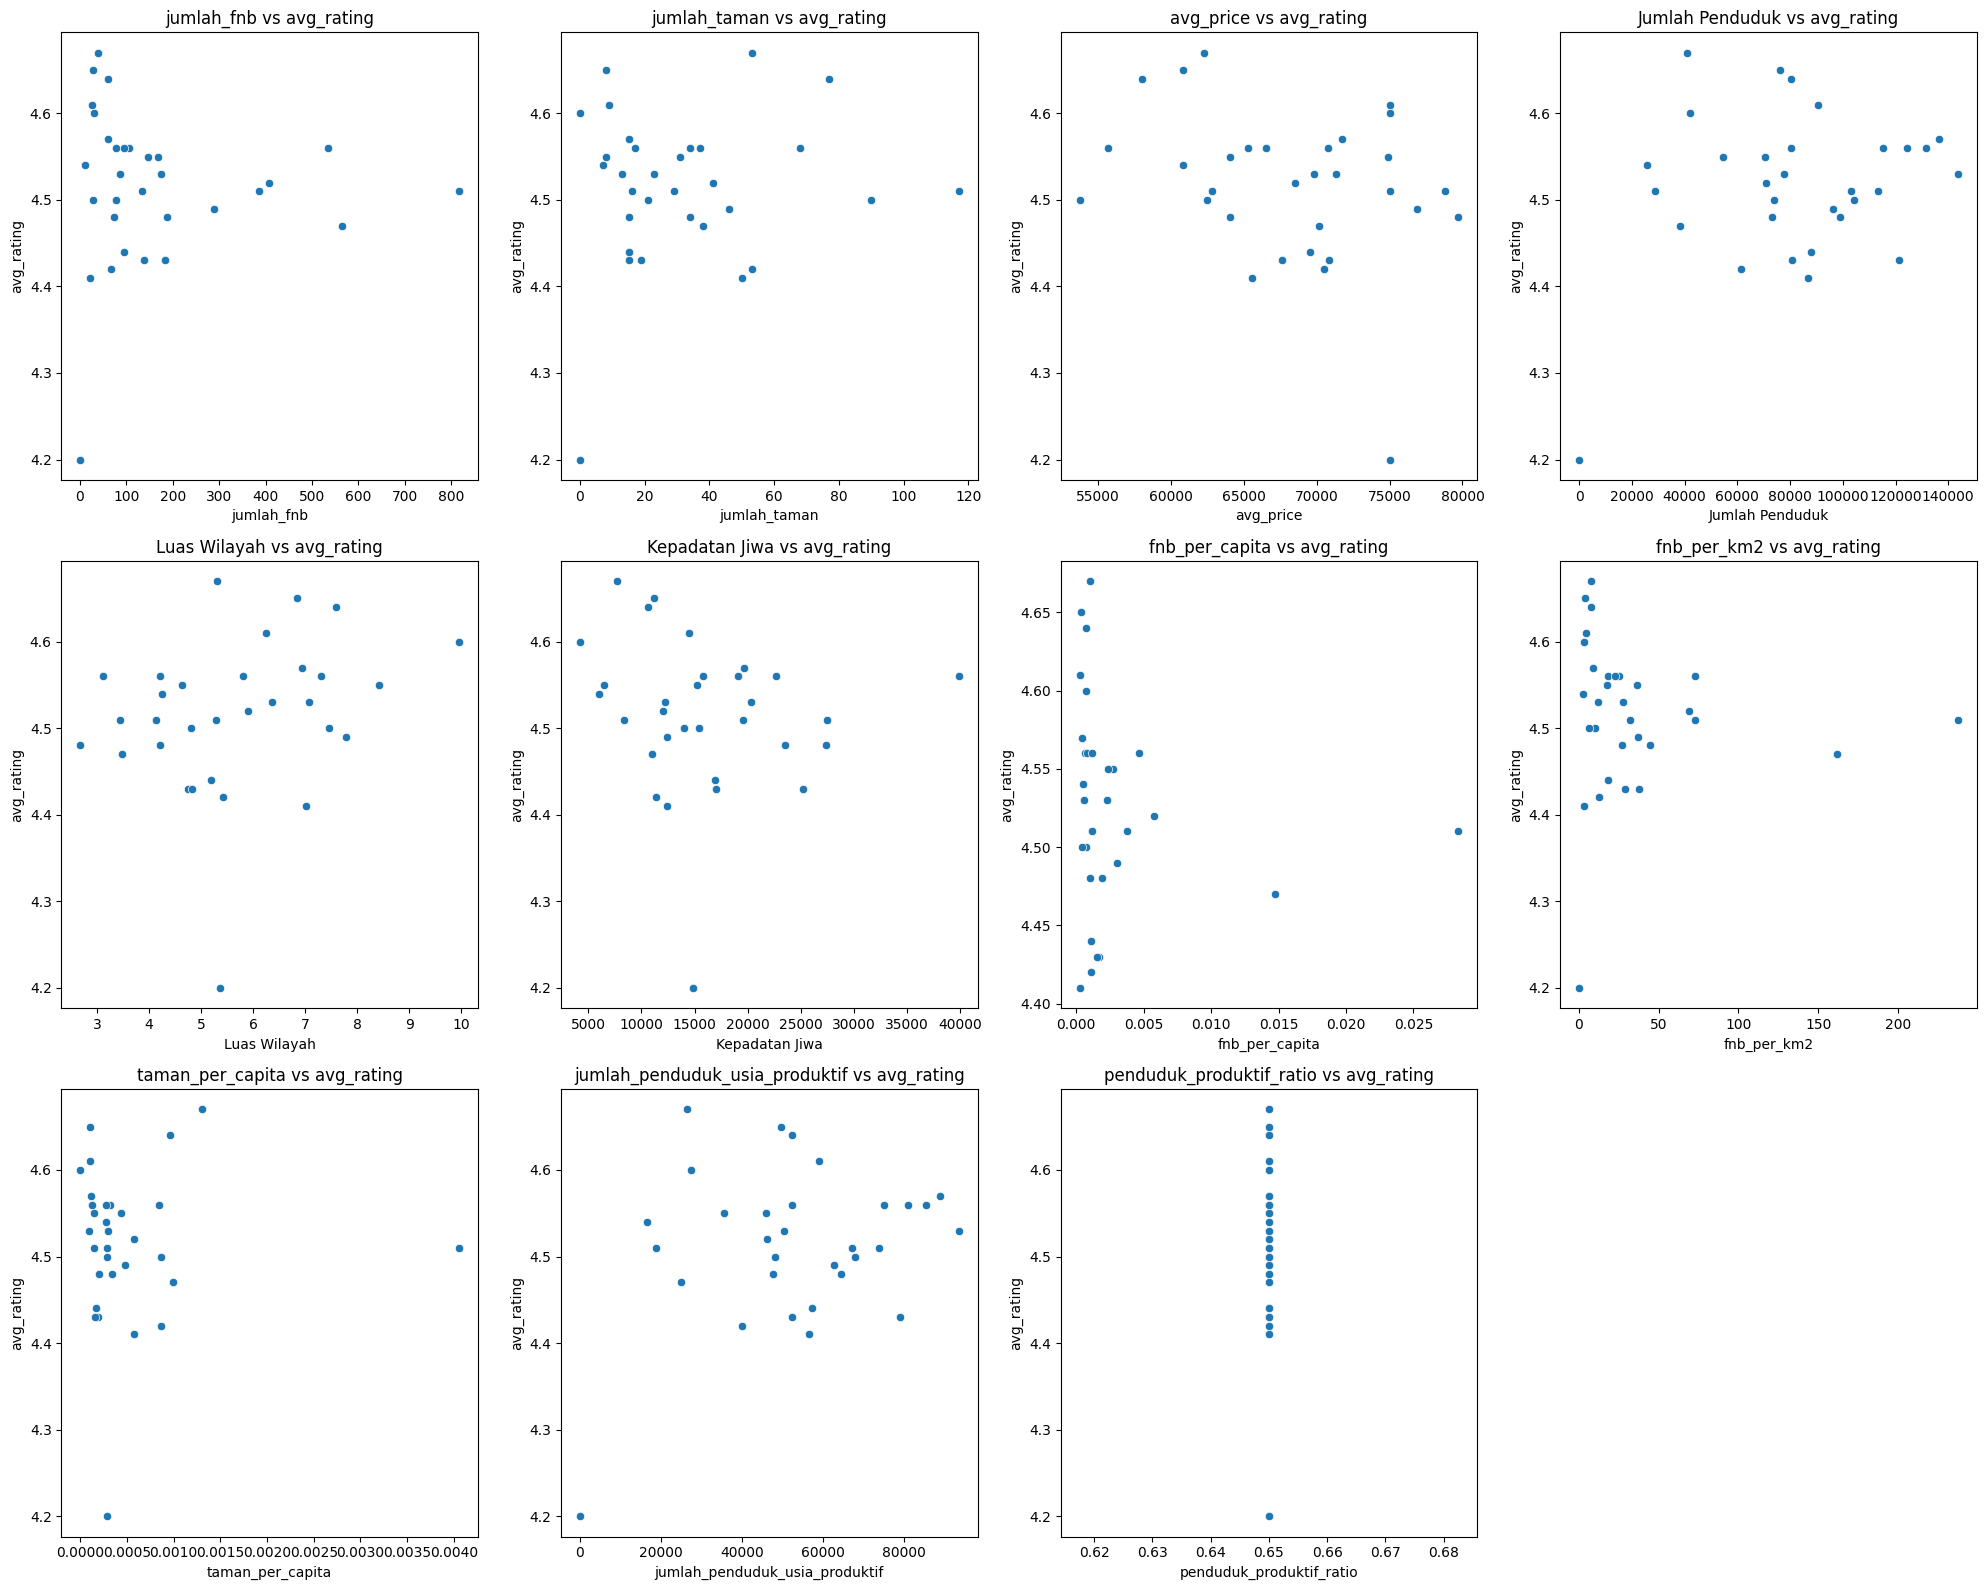

In [283]:

plt.figure(figsize=(20, 16))
num_cols = df.select_dtypes(include=[np.number]).columns.drop('avg_rating')

for idx, col in enumerate(num_cols):
    plt.subplot(3, 4, idx + 1)
    sns.scatterplot(x=col, y='avg_rating', data=df)
    plt.title(f'{col} vs avg_rating')
    plt.xlabel(col)
    plt.ylabel('avg_rating')

plt.tight_layout()
plt.show()